In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [98]:
train = pd.read_csv('train.csv')
train.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [99]:
train.shape

(58645, 13)

In [100]:
train.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [101]:
train.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [102]:
train.duplicated().sum()

0

In [103]:
test = pd.read_csv('test.csv')
test.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [104]:
test.shape

(39098, 12)

In [105]:
test.isnull().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [106]:
test.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,39098.000000,39098.000000,3.909800e+04,39098.000000,39098.000000,39098.000000,39098.000000,39098.000000
mean,78193.500000,27.566781,6.406046e+04,4.687068,9251.466188,10.661216,0.159573,5.830707
std,11286.764749,6.032761,3.795583e+04,3.868395,5576.254680,3.020220,0.091633,4.072157
min,58645.000000,20.000000,4.000000e+03,0.000000,700.000000,5.420000,0.000000,2.000000
25%,68419.250000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000
50%,78193.500000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000
75%,87967.750000,30.000000,7.588500e+04,7.000000,12000.000000,12.990000,0.210000,8.000000
max,97742.000000,94.000000,1.900000e+06,42.000000,35000.000000,22.110000,0.730000,30.000000


In [107]:
concat_df = pd.concat([train, test], axis = 0)
concat_df.shape

(97743, 13)

In [108]:
concat_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0.0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0.0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0.0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0.0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0.0


<Axes: xlabel='loan_status'>

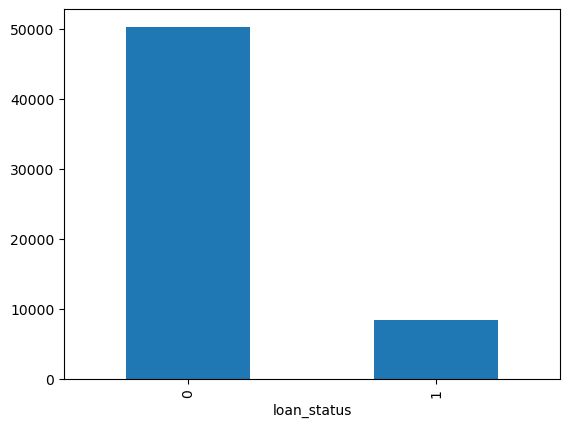

In [109]:
train['loan_status'].value_counts().plot(kind = 'bar')

In [110]:
concat_df['id'].nunique()

97743

In [111]:
concat_df['person_age'].max()

123

In [112]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97743 entries, 0 to 39097
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          97743 non-null  int64  
 1   person_age                  97743 non-null  int64  
 2   person_income               97743 non-null  int64  
 3   person_home_ownership       97743 non-null  object 
 4   person_emp_length           97743 non-null  float64
 5   loan_intent                 97743 non-null  object 
 6   loan_grade                  97743 non-null  object 
 7   loan_amnt                   97743 non-null  int64  
 8   loan_int_rate               97743 non-null  float64
 9   loan_percent_income         97743 non-null  float64
 10  cb_person_default_on_file   97743 non-null  object 
 11  cb_person_cred_hist_length  97743 non-null  int64  
 12  loan_status                 58645 non-null  float64
dtypes: float64(4), int64(5), object(4)
m

In [113]:
categorical_columns = concat_df.select_dtypes(include = 'object')
categorical_columns.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

In [114]:
numerical_columns = concat_df.select_dtypes(exclude='object').drop(['loan_status', 'id'], axis = 1)
numerical_columns.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'],
      dtype='object')

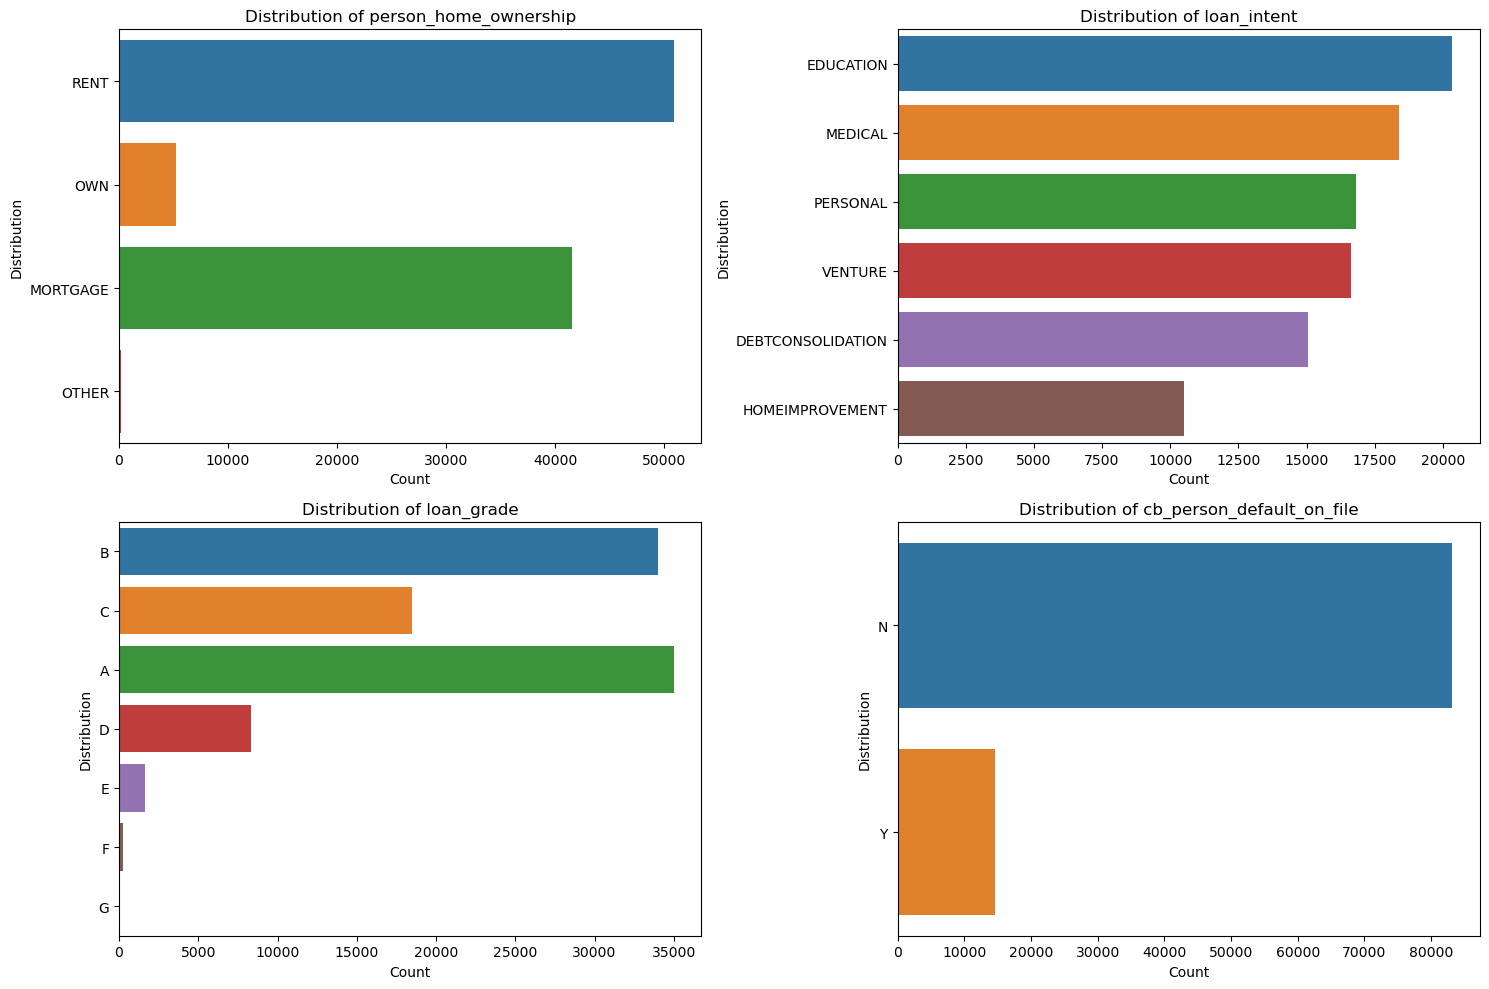

In [115]:
fig, axes = plt.subplots(2, 2, figsize= (15,10))
axes = axes.flatten()

for i, col in enumerate(categorical_columns.columns):
    sns.countplot(y=col, data=concat_df, ax = axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Distribution')

plt.tight_layout()
plt.show()

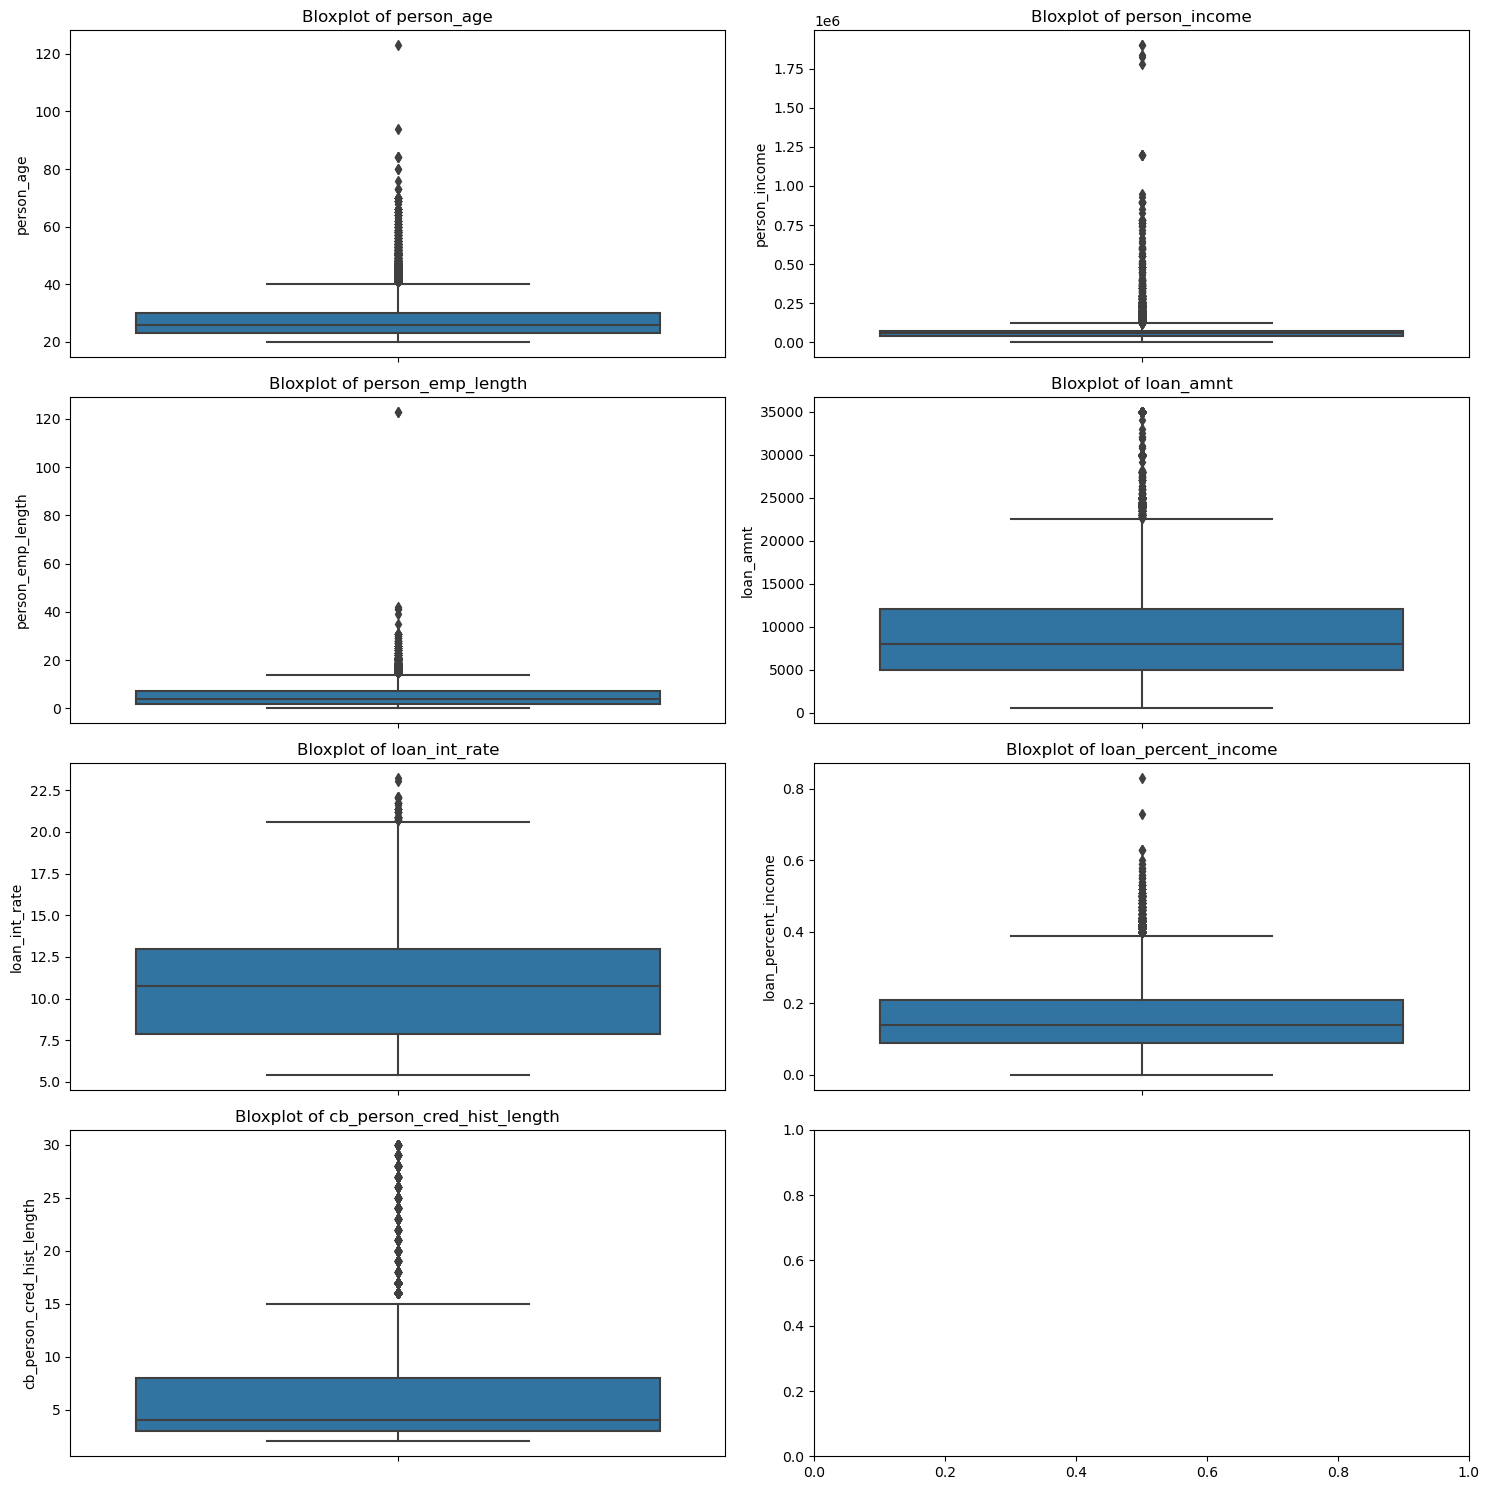

In [116]:
fig, axes = plt.subplots(4, 2, figsize=(15,15))
axes = axes.flatten()

for i, col in enumerate(numerical_columns.columns):
    sns.boxplot(data = concat_df, y=col, ax=axes[i])
    axes[i].set_title(f'Bloxplot of {col}')

plt.tight_layout()
plt.show()

In [117]:
concat_df[concat_df['person_age'] == 123]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
47336,47336,123,36000,MORTGAGE,7.0,PERSONAL,B,6700,10.75,0.18,N,4,0.0


In [118]:
concat_df[concat_df['person_emp_length'] == 123]

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
41079,41079,28,60350,MORTGAGE,123.0,MEDICAL,D,25000,15.95,0.35,Y,6,1.0
49252,49252,21,192000,MORTGAGE,123.0,VENTURE,B,20000,11.49,0.10,N,2,0.0


In [119]:
def replace_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3-q1
    lower = q1-1.5*iqr
    upper = q3+1.5*iqr
    median_value = df[column].median()
    df[column] = np.where((df[column]<lower)|(df[column]>upper), median_value, df[column])
    return df

In [120]:
for col in numerical_columns.columns:
    concat_df = replace_outliers(concat_df, col)

In [121]:
concat_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,97743.000000,97743.00000,97743.000000,97743.000000,97743.000000,97743.000000,97743.000000,97743.000000,58645.000000
mean,48871.000000,26.70623,59477.930563,4.410270,8603.167511,10.666326,0.153265,5.320391,0.142382
std,28216.118018,4.39856,23192.882520,3.379923,4539.860633,3.020185,0.082279,3.217919,0.349445
min,0.000000,20.00000,4000.000000,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,24435.500000,23.00000,42000.000000,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,48871.000000,26.00000,58000.000000,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,73306.500000,29.00000,72000.000000,6.000000,12000.000000,12.990000,0.200000,7.000000,0.000000
max,97742.000000,40.00000,126252.000000,14.000000,22500.000000,20.620000,0.390000,15.000000,1.000000


In [122]:
le = LabelEncoder()
for i in categorical_columns.columns:
    concat_df[i] = le.fit_transform(concat_df[i])

In [123]:
concat_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37.0,35000.0,3,0.0,1,1,6000.0,11.49,0.17,0,14.0,0.0
1,1,22.0,56000.0,2,6.0,3,2,4000.0,13.35,0.07,0,2.0,0.0
2,2,29.0,28800.0,2,8.0,4,0,6000.0,8.90,0.21,0,10.0,0.0
3,3,30.0,70000.0,3,14.0,5,1,12000.0,11.11,0.17,0,5.0,0.0
4,4,22.0,60000.0,3,2.0,3,0,6000.0,6.92,0.10,0,3.0,0.0


In [124]:
concat_df = concat_df.drop('id', axis = 1)

In [125]:
newtrain = concat_df.iloc[0:58645, :]
newtest = concat_df.iloc[58645:, :].drop('loan_status', axis = 1)

In [126]:
newtrain.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37.0,35000.0,3,0.0,1,1,6000.0,11.49,0.17,0,14.0,0.0
1,22.0,56000.0,2,6.0,3,2,4000.0,13.35,0.07,0,2.0,0.0
2,29.0,28800.0,2,8.0,4,0,6000.0,8.90,0.21,0,10.0,0.0
3,30.0,70000.0,3,14.0,5,1,12000.0,11.11,0.17,0,5.0,0.0
4,22.0,60000.0,3,2.0,3,0,6000.0,6.92,0.10,0,3.0,0.0


In [127]:
newtest.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,23.0,69000.0,3,3.0,2,5,8000.0,15.76,0.36,0,2.0
1,26.0,96000.0,0,6.0,4,2,10000.0,12.68,0.10,1,4.0
2,26.0,30000.0,3,5.0,5,4,4000.0,17.19,0.13,1,2.0
3,33.0,50000.0,3,4.0,0,0,7000.0,8.90,0.14,0,7.0
4,26.0,102000.0,0,8.0,2,3,15000.0,16.32,0.15,1,4.0


In [128]:
newtrain.shape

(58645, 12)

In [129]:
newtest.shape

(39098, 11)

In [130]:
x = newtrain.drop('loan_status', axis = 1)
y = newtrain['loan_status']

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [132]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [133]:
models = {'Logistic Regression': LogisticRegression(), 'Random Forest': RandomForestClassifier(),
         'Bagging': BaggingClassifier(), 'Extra Tree': ExtraTreesClassifier(), 'LightGBM': LGBMClassifier(),
         'Gradient Boosting': GradientBoostingClassifier(), 'Adaboost': AdaBoostClassifier(),
         'XGB': XGBClassifier()}

In [134]:
def evaluate_models(x_train,x_test, y_train, y_test, models):
    results = {}
    for name, model in models.items():
        predictions = model.fit(x_train, y_train).predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        results[name] = accuracy
    return results

In [135]:
results = evaluate_models(x_train_resampled,x_test, y_train_resampled, y_test, models)

[LightGBM] [Info] Number of positive: 40216, number of negative: 40216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1797
[LightGBM] [Info] Number of data points in the train set: 80432, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [136]:
best_model_name = max(results, key = results.get)
best_model = models[best_model_name]

In [137]:
print(f"best model is {best_model_name} with accuracy {results[best_model_name]}")

best model is XGB with accuracy 0.951828800409242


In [138]:
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [139]:
print(accuracy_score(y_test, y_pred))

0.9526813880126183


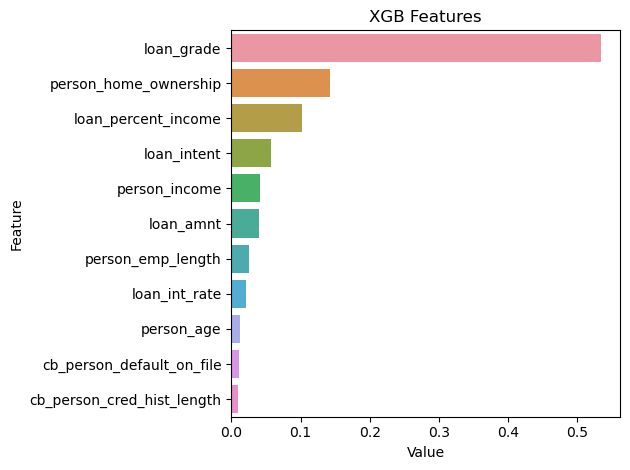

In [140]:
feature_imp = pd.DataFrame(sorted(zip(best_model.feature_importances_, x.columns), reverse=True)[:20], columns=['Value','Feature'])
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title(f'{best_model_name} Features')
plt.tight_layout()
plt.show()


In [141]:
x_train = newtrain.drop('loan_status', axis = 1)
y_train = newtrain['loan_status']
x_test = newtest
y_pred = best_model.fit(x_train, y_train).predict(x_test)

In [142]:
solution = pd.DataFrame({'id':test['id'], 'loan_status': y_pred})
solution.head()

,id,loan_status
0,58645,1
1,58646,0
2,58647,1
3,58648,0
4,58649,0


In [143]:
solution.to_csv('Solution1.csv', index = False)